# IST 718: Big Data Analytics

- Professor: Daniel Acuna <deacuna@syr.edu>

## General instructions:

- You are welcome to discuss the problems with your classmates but __you are not allowed to copy any part of your answers either from your classmates or from the internet__
- You can put the homework files anywhere you want in your http://notebook.acuna.io workspace but _do not change_ the file names. The TAs and the professor use these names to grade your homework.
- Remove or comment out code that contains `raise NotImplementedError`. This is mainly to make the `assert` statement fail if nothing is submitted.
- The tests shown in some cells (i.e., `assert` and `np.testing.` statements) are used to grade your answers. **However, the professor and TAs will use __additional__ test for your answer. Think about cases where your code should run even if it passess all the tests you see.**
- Before downloading and submitting your work through Blackboard, remember to save and press `Validate` (or go to 
`Kernel`$\rightarrow$`Restart and Run All`). 
- Good luck!

In [1]:
# Load the packages needed for this part
# create spark and sparkcontext objects
from pyspark.sql import SparkSession
import numpy as np

spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext

from pyspark.ml import feature
from pyspark.ml import regression
from pyspark.sql import functions as fn
from pyspark.sql import Row
from pyspark import sql

## Warning: Use exclusively Spark. Do not use Pandas at all in this assignment

# Part 2: Dataframes and Spark ML

In this section, you will learn to create dataframes from messy data and then perform simple regression on it.

There is some mysterious process generating data, stored in `/datasets/host_server_requests`, with the following format:

`feature1|feature2|...|featurem => outcome`

`feature1` can be either "HOST" or "SERVER" and from feature $2$ through $m$ are floating point numbers.

In [2]:
requests_rdd = sc.textFile('/datasets/host_server_requests')

## Question 1:

In this question, you will create a function `process_line` that receives a line from `/datasets/host_server_requests` and returns a `Row` object with the following columns: 

- You will codify the first feature as a column `f1` with a `1` if the source is `HOST` and `0` otherwise
- You will create 7 other features that you assign to columns `f2`, `f3`, ..., through `f8`
- Finally, you will assign the outcome to the column `label`
- Remember to make all features of type `float`.

For the following code:


```python
requests_rdd.map(process_line).take(10)
```

it should generate the following:

```python
[Row(f1=1.0, f2=2e-05, f3=0.80279, f4=-0.09174, f5=0.04041, f6=-0.22504, f7=-0.0504, f8=0.58149, label=163.877101489),
 Row(f1=1.0, f2=5e-05, f3=-0.00454, f4=-0.0211, f5=0.00174, f6=-0.11684, f7=0.19182, f8=-0.23745, label=-105.023368852),
 Row(f1=1.0, f2=0.00015, f3=-0.10437, f4=0.04869, f5=0.18333, f6=-0.21864, f7=0.27638, f8=-0.13441, label=-115.011801582),
 Row(f1=1.0, f2=-0.00015, f3=0.27118, f4=0.14526, f5=0.06101, f6=0.13401, f7=0.06237, f8=-0.74065, label=-122.623452696),
 Row(f1=1.0, f2=-6e-05, f3=0.1413, f4=0.12084, f5=0.05452, f6=0.09272, f7=0.2534, f8=-0.65331, label=-117.130523174),
 Row(f1=1.0, f2=-8e-05, f3=-0.41534, f4=-0.04205, f5=-0.00724, f6=-0.07463, f7=0.13273, f8=0.19112, label=-73.5775668047),
 Row(f1=1.0, f2=-8e-05, f3=-0.45937, f4=-0.23509, f5=-0.05679, f6=0.06077, f7=-0.49597, f8=-0.30668, label=-137.37933148),
 Row(f1=0.0, f2=2e-05, f3=-0.23465, f4=0.07345, f5=-0.07217, f6=-0.19256, f7=-0.14377, f8=-0.15183, label=-162.804738349),
 Row(f1=0.0, f2=-7e-05, f3=-0.10321, f4=0.27467, f5=0.04058, f6=-0.24541, f7=0.08631, f8=-0.2979, label=-212.111291232),
 Row(f1=1.0, f2=-7e-05, f3=-0.01039, f4=-0.00453, f5=-0.01352, f6=-0.05199, f7=-0.3772, f8=-0.19641, label=-91.5022329392)]
```


In [30]:
# YOUR CODE HERE

def process_line(e):
    e=e.replace(' =>  ','|').split("|")
    if e[0]=='HOST':
        f1=float(1)
    else:
        f1=float(0)
        
    
     
    #x=Row(f1,f2,f3,f4,f5,f6,f7,f8,label)
    y=Row(f1=f1,f2=float(e[1]),f3=float(e[2]),f4=float(e[3]),f5=float(e[4]),f6=float(e[5]),f7=float(e[6]),f8=float(e[7]),label=float(e[8]) )

    return y
    
#raise NotImplementedError()

In [31]:
# try it here
requests_rdd.map(process_line).take(10)

[Row(f1=0.0, f2=8e-05, f3=0.45592, f4=0.25362, f5=-0.12878, f6=-0.0693, f7=-0.1474, f8=-0.53736, label=-106.947151761),
 Row(f1=0.0, f2=-1e-05, f3=0.10405, f4=-0.17047, f5=0.10127, f6=0.13776, f7=0.66619, f8=0.32221, label=127.061566761),
 Row(f1=1.0, f2=-1e-05, f3=-0.72394, f4=0.31161, f5=0.06975, f6=0.0086, f7=-0.44817, f8=-0.22976, label=-170.222653879),
 Row(f1=1.0, f2=0.00024, f3=-0.12887, f4=-0.01287, f5=0.18377, f6=-0.07004, f7=0.10632, f8=-0.40884, label=-127.850350049),
 Row(f1=1.0, f2=6e-05, f3=-0.06767, f4=0.08402, f5=0.14438, f6=-0.19704, f7=0.2839, f8=-0.12487, label=-110.295233798),
 Row(f1=1.0, f2=5e-05, f3=0.59406, f4=0.25195, f5=-0.00541, f6=-0.05218, f7=0.12202, f8=-0.1285, label=27.7039261796),
 Row(f1=0.0, f2=-8e-05, f3=-0.08562, f4=-0.00398, f5=-0.17124, f6=-0.13839, f7=-0.23696, f8=-0.814, label=-301.722572842),
 Row(f1=1.0, f2=-0.0001, f3=-0.28606, f4=-0.00447, f5=-0.10446, f6=-0.25006, f7=-0.03288, f8=-0.87445, label=-361.98704195),
 Row(f1=0.0, f2=-0.00018, f3=

In [32]:
# 5 pts
np.testing.assert_equal(len(requests_rdd.map(process_line).first()), 9)
np.testing.assert_equal(requests_rdd.map(process_line).count(), 10000)

## Question 2:

Transform the `requests_rdd` RDD into a Spark 2.0 DataFrame and store it in `requests_df`

In [33]:
# YOUR CODE HERE
myrdd=requests_rdd.map(process_line)
requests_df=spark.createDataFrame(myrdd,samplingRatio=1.0)

#raise NotImplementedError()

In [34]:
# 5 pts
np.testing.assert_equal(type(requests_df), sql.dataframe.DataFrame)
np.testing.assert_equal(set(requests_df.columns), {'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'label'})
np.testing.assert_equal(requests_df.count(), 10000)

## Question 3:

In this question, we will explore the data. We have a hypothesis that depending on whether the request was from the "HOST" or "SERVER" (`f1` column), there are significant difference in the outcome (`label` column).

You will find whether this is true by computing two quantities for each group of `f1`. You will compute the mean outcome and the *standard error of the mean* or SE of the outcome. The equation for SE of a variable $x$ is:

$$\text{SE}(x) = \frac{\text{std}(x)}{\sqrt{n}}$$

From `requests_df`, create a dataframe `summary_df` that contains, for each value of `f1`, the mean `label` as a column `mlabel` and the SEM of `label` as a column `semlabel`. For the SE equation, use the *sample standard devivation* computed by `fn.stddev_samp`. **Hint: perform an aggregate operation and use appropriate combinations of functions in the package `fn`. Rename columns appropriately**

In [35]:
# YOUR CODE HERE
summary_df=requests_df.select('f1','label')
df1=summary_df.groupBy('f1').mean('label')
df2=summary_df.groupBy('f1').agg(fn.stddev_samp('label')/70.7106781187)
df3=df1.join(df2,on='f1')
df3 = df3.withColumnRenamed('avg(label)', 'mlabel')
df3 = df3.withColumnRenamed('(stddev_samp(label) / 70.7106781187)', 'semlabel')
summary_df=df3
#raise NotImplementedError()
summary_df.printSchema()
summary_df.select('f1', 'mlabel').show()

root
 |-- f1: double (nullable = true)
 |-- mlabel: double (nullable = true)
 |-- semlabel: double (nullable = true)

+---+-------------------+
| f1|             mlabel|
+---+-------------------+
|0.0|-29.611753412328927|
|1.0| -12.62243193686321|
+---+-------------------+



The schema of `summary_df` should look like:

```python
summary_df.printSchema()
```
```console
root
 |-- f1: double (nullable = true)
 |-- mlabel: double (nullable = true)
 |-- semlabel: double (nullable = true)

```
The mean label for each `f1` feature should be:

```python
summary_df.select('f1', 'mlabel').show()
```

```console
+---+------------------+
| f1|            mlabel|
+---+------------------+
|0.0|-29.61175341232892|
|1.0|-12.62243193686321|
+---+------------------+
```

In [36]:
# 10 pts
np.testing.assert_equal(summary_df.count(), 2)
np.testing.assert_equal(set(summary_df.columns), {'f1', 'mlabel', 'semlabel'})
np.testing.assert_approx_equal(summary_df.rdd.map(lambda r: r.mlabel).sum(), -42.23418534919213,
                              significant=3)
np.testing.assert_approx_equal(summary_df.rdd.map(lambda r: r.semlabel).sum(), 3.503568410619124,
                              significant=3)

Statistically, we say that a mean $\overline{x}$ is *statistically* different from another mean $\overline{y}$ if it is not within 2 standard errors of the mean of x (i.e., $\overline{y} \not\in \{\overline{x} \pm 2\text{SE}(x)\}$). Discuss whether you think the mean label for f1 = 0 is statistically different from the mean label for f1 = 1

In [37]:
# display it to make your argument
summary_df.show()

+---+-------------------+------------------+
| f1|             mlabel|          semlabel|
+---+-------------------+------------------+
|0.0|-29.611753412328927|1.7556362131320222|
|1.0| -12.62243193686321| 1.747932915261127|
+---+-------------------+------------------+



**3 pts for your answer below:**

In [58]:
y_mean_actual=-12.62243193686321
x_mean_2se_plus=-29.611753412328927+2*1.7556362131320222
x_mean_2se_minus=-29.611753412328927-2*1.7556362131320222
print('y mean is:',y_mean_actual)
print('x_mean -2 SE  away:',x_mean_2se_minus)
print('x_mean +2 SE  away:',x_mean_2se_plus)

y mean is: -12.62243193686321
x_mean -2 SE  away: -33.12302583859297
x_mean +2 SE  away: -26.10048098606488


YOUR ANSWER HERE: x_mean is statistically different from another mean y_mean as it is not within 2 standard errors of x 

## Question 4:

Use the transformer `VectorAssembler` to create a dataframe that puts all columns `f1`, `f2`, ..., `f8` from `requests_df` into a column named `features`. Assign the vector assembler object into a variable `va` and the new dataframe into the variable  `features_df`

In [38]:
from pyspark.ml.feature import VectorAssembler

In [39]:
# YOUR CODE HERE
va = VectorAssembler(
    inputCols=["f1", "f2", "f3","f4","f5","f6","f7","f8"],outputCol="features")
features_df = va.transform(requests_df)
features_df.printSchema()
#raise NotImplementedError()

root
 |-- f1: double (nullable = true)
 |-- f2: double (nullable = true)
 |-- f3: double (nullable = true)
 |-- f4: double (nullable = true)
 |-- f5: double (nullable = true)
 |-- f6: double (nullable = true)
 |-- f7: double (nullable = true)
 |-- f8: double (nullable = true)
 |-- label: double (nullable = true)
 |-- features: vector (nullable = true)



The schema of the new dataframe should be like this:

```python
features_df.printSchema()
```

```console
root
 |-- f1: double (nullable = true)
 |-- f2: double (nullable = true)
 |-- f3: double (nullable = true)
 |-- f4: double (nullable = true)
 |-- f5: double (nullable = true)
 |-- f6: double (nullable = true)
 |-- f7: double (nullable = true)
 |-- f8: double (nullable = true)
 |-- label: double (nullable = true)
 |-- features: vector (nullable = true)
```

In [40]:
# try it here
features_df.show(3)

+---+-------+--------+--------+--------+-------+--------+--------+--------------+--------------------+
| f1|     f2|      f3|      f4|      f5|     f6|      f7|      f8|         label|            features|
+---+-------+--------+--------+--------+-------+--------+--------+--------------+--------------------+
|0.0| 8.0E-5| 0.45592| 0.25362|-0.12878|-0.0693| -0.1474|-0.53736|-106.947151761|[0.0,8.0E-5,0.455...|
|0.0|-1.0E-5| 0.10405|-0.17047| 0.10127|0.13776| 0.66619| 0.32221| 127.061566761|[0.0,-1.0E-5,0.10...|
|1.0|-1.0E-5|-0.72394| 0.31161| 0.06975| 0.0086|-0.44817|-0.22976|-170.222653879|[1.0,-1.0E-5,-0.7...|
+---+-------+--------+--------+--------+-------+--------+--------+--------------+--------------------+
only showing top 3 rows



In [41]:
# 5 pts
np.testing.assert_equal(type(features_df), sql.dataframe.DataFrame)
np.testing.assert_equal(set(features_df.columns), 
                        {'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'features', 'label'})

## Question 5:

Run a linear regression model on `features_df` using the `features` column to predict the `label` column. Store the transformer fit to the data in the `lr_model` variable (the transformer is what the estimator's `fit` function returns). Use the transformer to create a dataframe named `predictions_df` with two columns: `label` and `prediction` based on the `features_df` dataframe.

In [42]:
# regression
from pyspark.ml import regression
# feature engineering
from pyspark.ml import feature

In [44]:
# YOUR CODE HERE
lr_estimator = regression.\
    LinearRegression(featuresCol="features", 
                     labelCol='label')
lr_model = lr_estimator.fit(features_df)
predictions_df=lr_model.transform(features_df).select('label','prediction')
predictions_df.show(5)
#raise NotImplementedError()

+--------------+-------------------+
|         label|         prediction|
+--------------+-------------------+
|-106.947151761| -98.40908603208513|
| 127.061566761| 107.50923895501401|
|-170.222653879|-165.34222232721729|
|-127.850350049|-107.50493927151456|
|-110.295233798|-109.90475992921165|
+--------------+-------------------+
only showing top 5 rows



The resulting dataframe should be in `predictions_df`. Running `predictions_df.show(5)` should produce something like

```python
predictions_df.show(5)
```

```console
+--------------+-------------------+
|         label|         prediction|
+--------------+-------------------+
| 163.877101489| 159.06994708337518|
|-105.023368852| -99.52598722329135|
|-115.011801582|-109.91382979074436|
|-122.623452696|-118.62864861627764|
|-117.130523174|-116.89245751669506|
+--------------+-------------------+
only showing top 5 rows
```


In [45]:
# 5 pts:
np.testing.assert_equal(set(predictions_df.columns), {'label', 'prediction'})
np.testing.assert_equal(predictions_df.count(), 10000)
np.testing.assert_equal(type(lr_model), regression.LinearRegressionModel)
np.testing.assert_equal(type(va), feature.VectorAssembler)

The root mean squared error is defined as

$$ \text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^n (\hat{y}_i - y_i)^2}$$

Combine functions in `fn` package and other functions to create a dataframe called `rmse_df` that contains the root mean squared error in column `rmse` based on the `predictions_df` dataframe.

In [47]:
# YOUR CODE HERE

rmse1 = predictions_df.agg(fn.sqrt(fn.mean((fn.col('label') - fn.col('prediction'))**2)).alias('rmse')).collect()
rmse_df = spark.createDataFrame(rmse1)
#raise NotImplementedError()

In [48]:
# 5 pts
np.testing.assert_array_less(rmse_df.first().rmse, 10)
np.testing.assert_equal(rmse_df.count(), 1)

## Question 6

Add the constant 10 to each feature in `requests_df` and redo the analytics pipeline from Q5, creating a vector assembler `va2`, `features2_df`, `lr_model2`, and `predictions2_df`. When adding the constant 10, preserve the column names in `features2_df` such that the columns in this new dataframe should be `f1` thorugh `f8`. Do not modify the column `label`. Fit a new linear model, similar to question 4, compute its root mean square error, and store it in `rmse2_df`.

In [49]:
# YOUR CODE HERE
requests_df=requests_df.select('f1',
                              (fn.col('f2')+10).alias('f2'),
                               (fn.col('f3')+10).alias('f3'),
                               (fn.col('f4')+10).alias('f4'),
                               (fn.col('f5')+10).alias('f5'),
                               (fn.col('f6')+10).alias('f6'),
                               (fn.col('f7')+10).alias('f7'),
                               (fn.col('f8')+10).alias('f8'),
                               'label'
                              )
va2 = VectorAssembler(
    inputCols=["f1", "f2", "f3","f4","f5","f6","f7","f8"],outputCol="features")
features_df = va.transform(requests_df)
lr_estimator = regression.\
    LinearRegression(featuresCol="features", 
                     labelCol='label')
lr_model2 = lr_estimator.fit(features_df)
predictions2_df=lr_model2.transform(features_df).select('label','prediction')

rmse1 = predictions2_df.agg(fn.sqrt(fn.mean((fn.col('label') - fn.col('prediction'))**2)).alias('rmse')).collect()

rmse2_df = spark.createDataFrame(rmse1)
#raise NotImplementedError()

In [50]:
# 10 pts:
np.testing.assert_equal(set(predictions2_df.columns), {'label', 'prediction'})
np.testing.assert_equal(predictions2_df.count(), 10000)
np.testing.assert_equal(type(va2), feature.VectorAssembler)
np.testing.assert_equal(type(lr_model2), regression.LinearRegressionModel)
np.testing.assert_array_less(rmse2_df.first().rmse, 10)
np.testing.assert_equal(rmse2_df.count(), 1)

Compare the root mean squared error of Q5 and Q6. They should be almost exactly the same. Also, compare the coefficients and intercepts of `lr_model` and `lr_model2`. 

In [51]:
print("RMSE Q5")
rmse_df.show()
print("RMSE Q6")
rmse2_df.show()
print("intercept lr_model", lr_model.intercept)
print("intercept lr_model2", lr_model2.intercept)
print("coefficients lr_model", lr_model.coefficients)
print("coefficients lr_model2", lr_model2.coefficients)

RMSE Q5
+-----------------+
|             rmse|
+-----------------+
|8.518758143015017|
+-----------------+

RMSE Q6
+-----------------+
|             rmse|
+-----------------+
|8.518758149285986|
+-----------------+

intercept lr_model -29.021294776587045
intercept lr_model2 -1693037.2892558663
coefficients lr_model [18.11935595015397,168571.48581162572,142.7430866560904,0.017768599744867115,0.5163985972921608,360.13479650837576,-0.018413421964002318,228.77831544950865]
coefficients lr_model2 [18.11935131589857,168568.65480481953,142.74310026811625,0.017766859206167697,0.5164476425069496,360.1347979000419,-0.018430371562648526,228.77830896437175]


**2 pts for your answer below:** Comment on why there are differences or similarities between coefficients, intercepts, RMSE, even though we modified the features. You can use [Latex in Markdown](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html#LaTeX-equations) to put some math into your explanation.

YOUR ANSWER HERE: 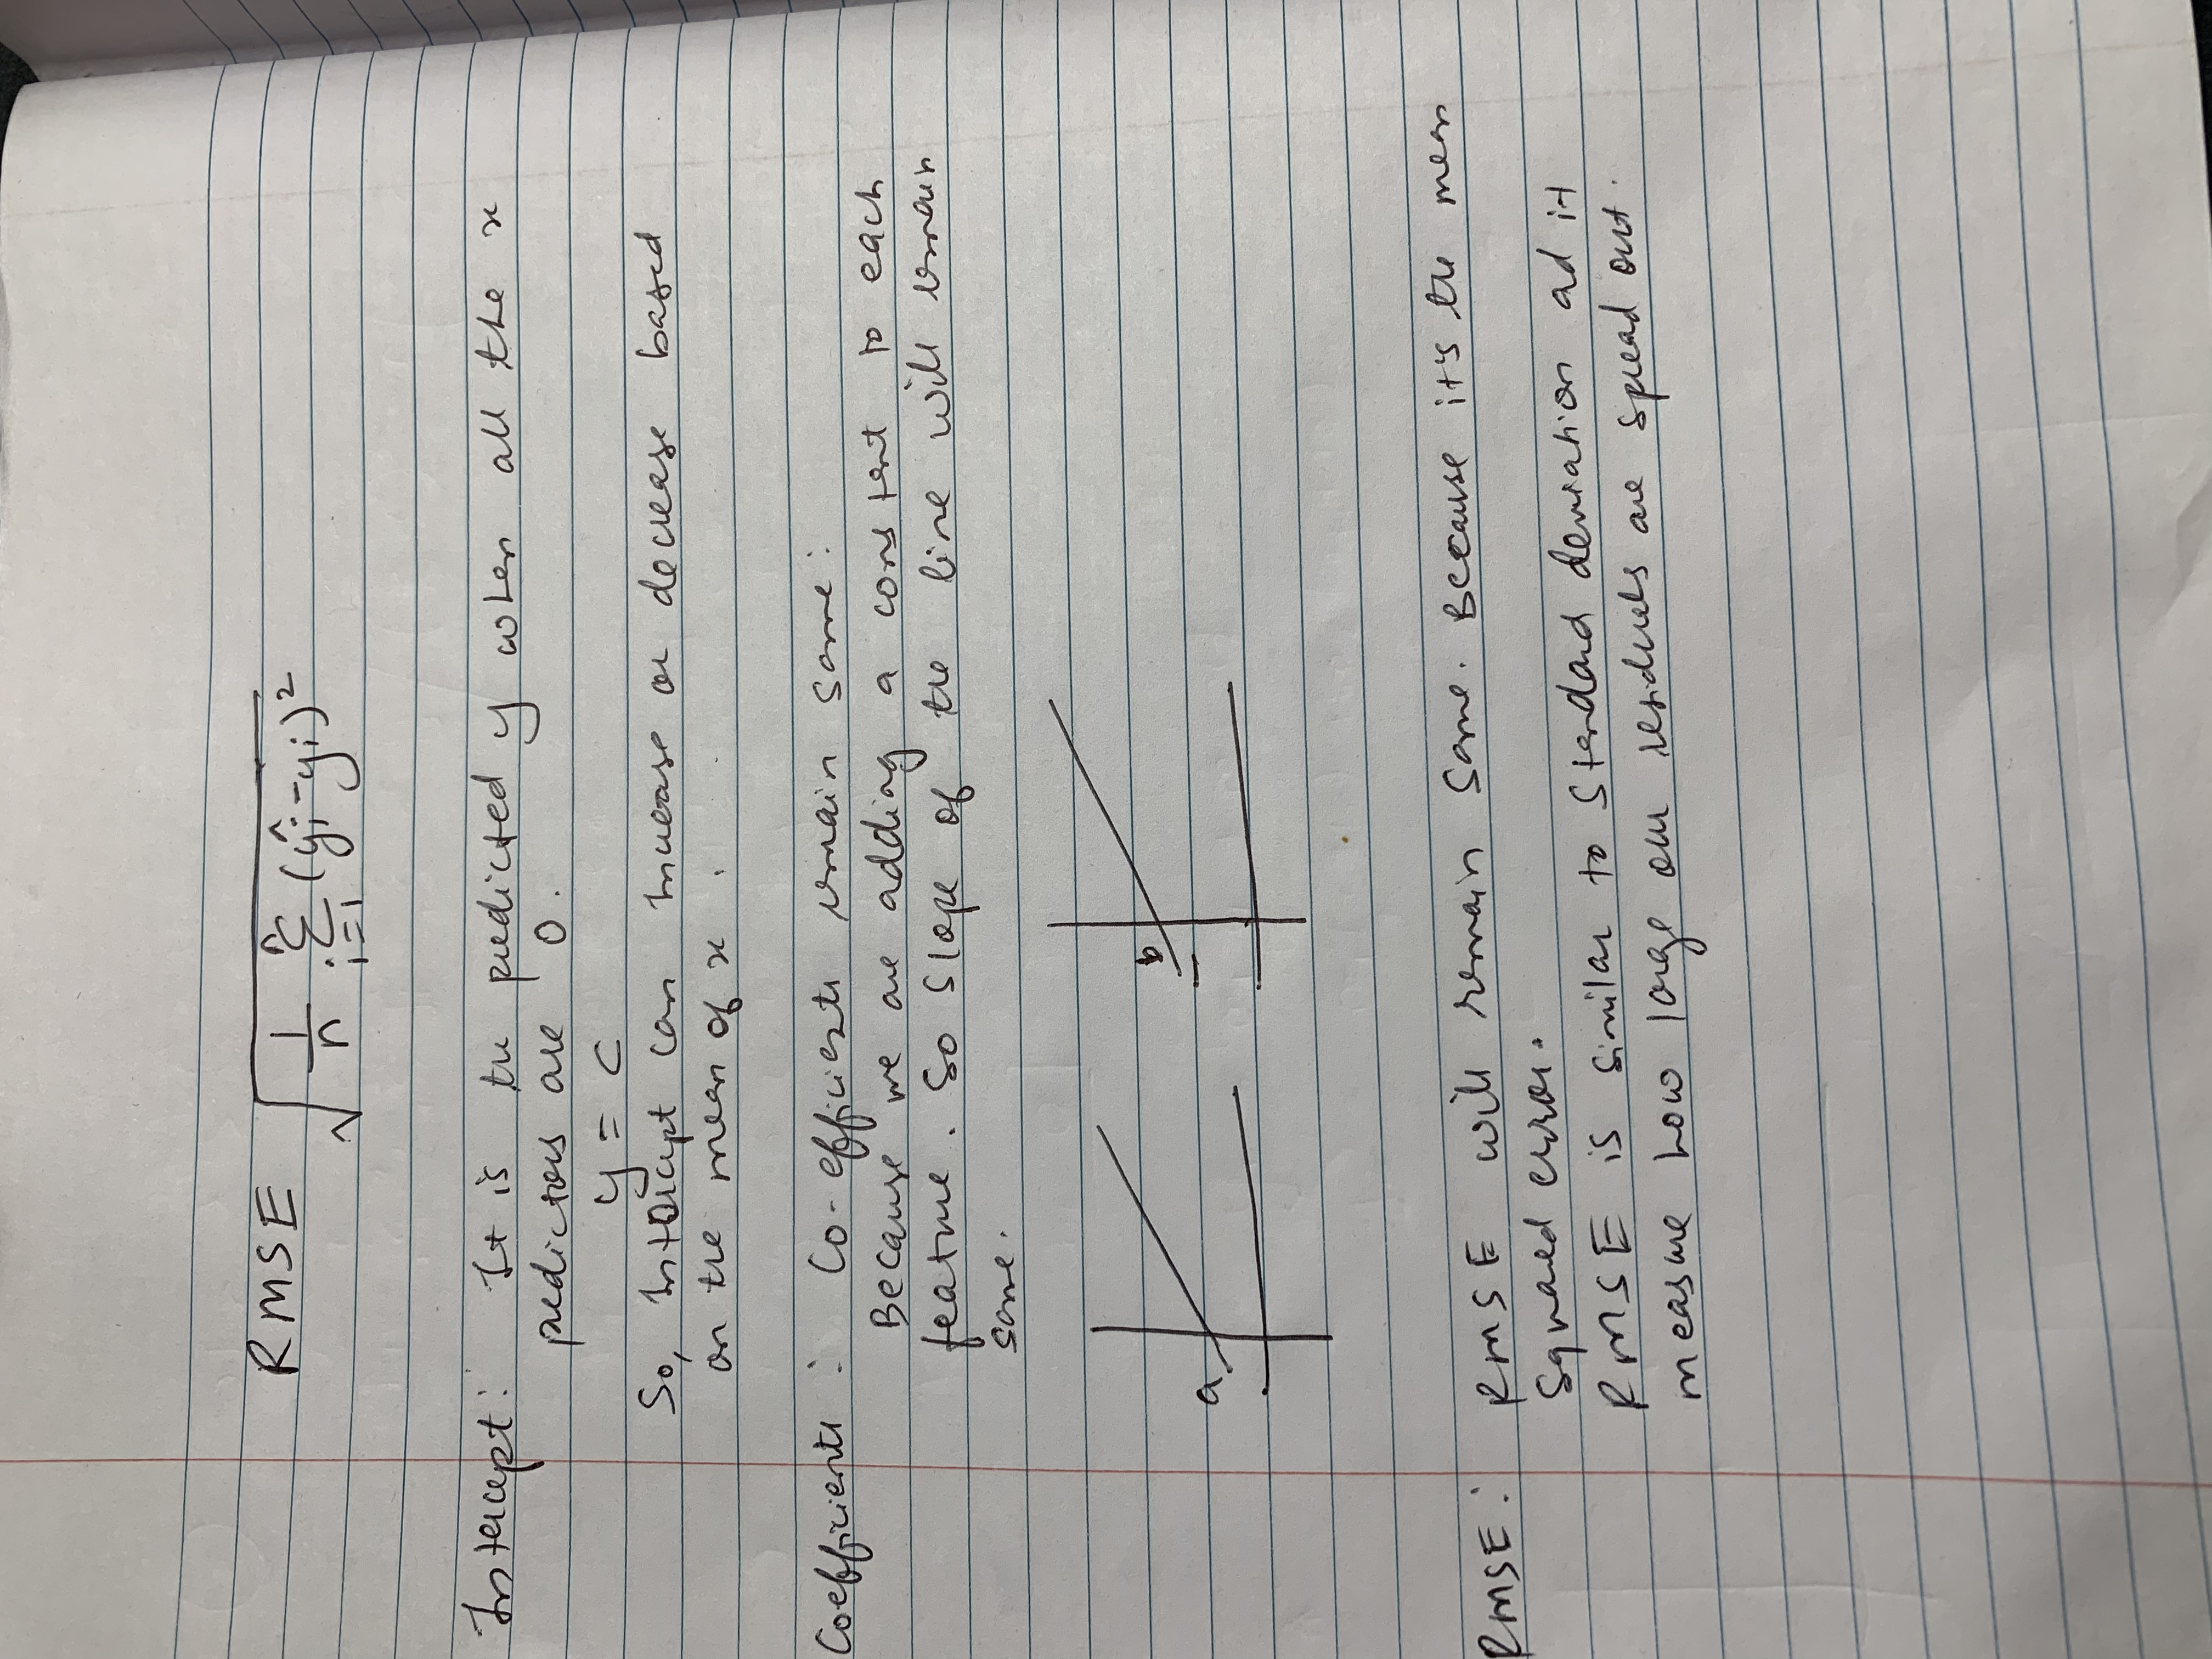